<a href="https://colab.research.google.com/github/Jinyong-20/Machine_Learning_Programming/blob/master/MidTerm/Copy_of_lesson2_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *95/100 수고 많으셨습니다*

# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# You need to mount your google drive  to the /content/gdrive folder of your virtual computer
# located in the colab server

from google.colab import drive
drive.mount("/content/gdrive")
#drive.mount("/content/gdrive", force_remount=True)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from fastai.vision import *

In [ ]:
from PIL import Image

## Get a list of URLs

### Search and scroll

Guide lines: (1) notebook 에 나오는 fastai 문장들의 의미는 docs.fast.ai 에 상세히 설명되어 있으므로 참조하면 됨. (2)  클래스나 메소드 이름위에 커서를 놓고 Cntrl+Click 를 하면 노트북 오른쪽에 이에 대한 정의가 나오므로 이를 참조할 수 있다. (3) 답안은 문제 뒤에 notebook 에 직접 작성하고 결과는 숙제 제출하듯이 github에 업로드하면 된다. (4) 본 시험을 수행하는 동안 인터넷에서 다운 받은 이미지 데이타 파일들은 본인의 github에 MidTerm 폴더를 만들어 그안에  답안지 노트북과 함계 업로드한다. 

### *Question 1 : 12/15*

*1.1 폴터 나 구글 스크린샷을 부족*

Question 1: (1.1) 아래 설명을 참조하여 구글에서 이미지 검색을 하여 동물 이미지를 5개의 카테고리를 지정하여 검색하라. 

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

(1.2) 검색된 각 이미지 리스트를 다음의 설명을 참조하여 개인 컴퓨터 다운로드 폴더에 다운로드하고 파일명을 urls_*.csv 형식으로 적절하게 명명하라 (그후 이 파일들은 개인의 구글 드라이브의 적절한 폴더에  upload 한다) 

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press <kbd>Ctrl</kbd><kbd>+Shift</kbd><kbd>+j</kbd> on Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> on macOS, and a small window the javascript 'Console' will appear. In Firefox press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>k</kbd> on Windows/Linux or <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd> on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### upload urls file into /content folder

(1.3)  다음 그림과 같이 구글 드라이브가 content/gdrive 폴더에 연결되는 것을 확인하고 스크린 캡춰를 해서 답안 노트북에 이미지를 삽입하라. 현재 시험 노트북에서 한 것 처럼 하면 된다. 시험문제에서 보여주는 파일구조와 경로는 예시로 보여준 것이며, 각자는 폴더구조가 다를 것이므로 이를 고려하여 노브툭 코드를 수정해야 한다. 이렇게 연결되면 colab notebook 은 구글 드라이브의 서브 폴더에 있는 *.csv 파일을 읽어 들일수 있다. ![alt text](https://drive.google.com/uc?id=1ObEUZxFDnXiK47lK_Lkg8z0e0Fe1T-QM)

You will need to run this cell once per each category.

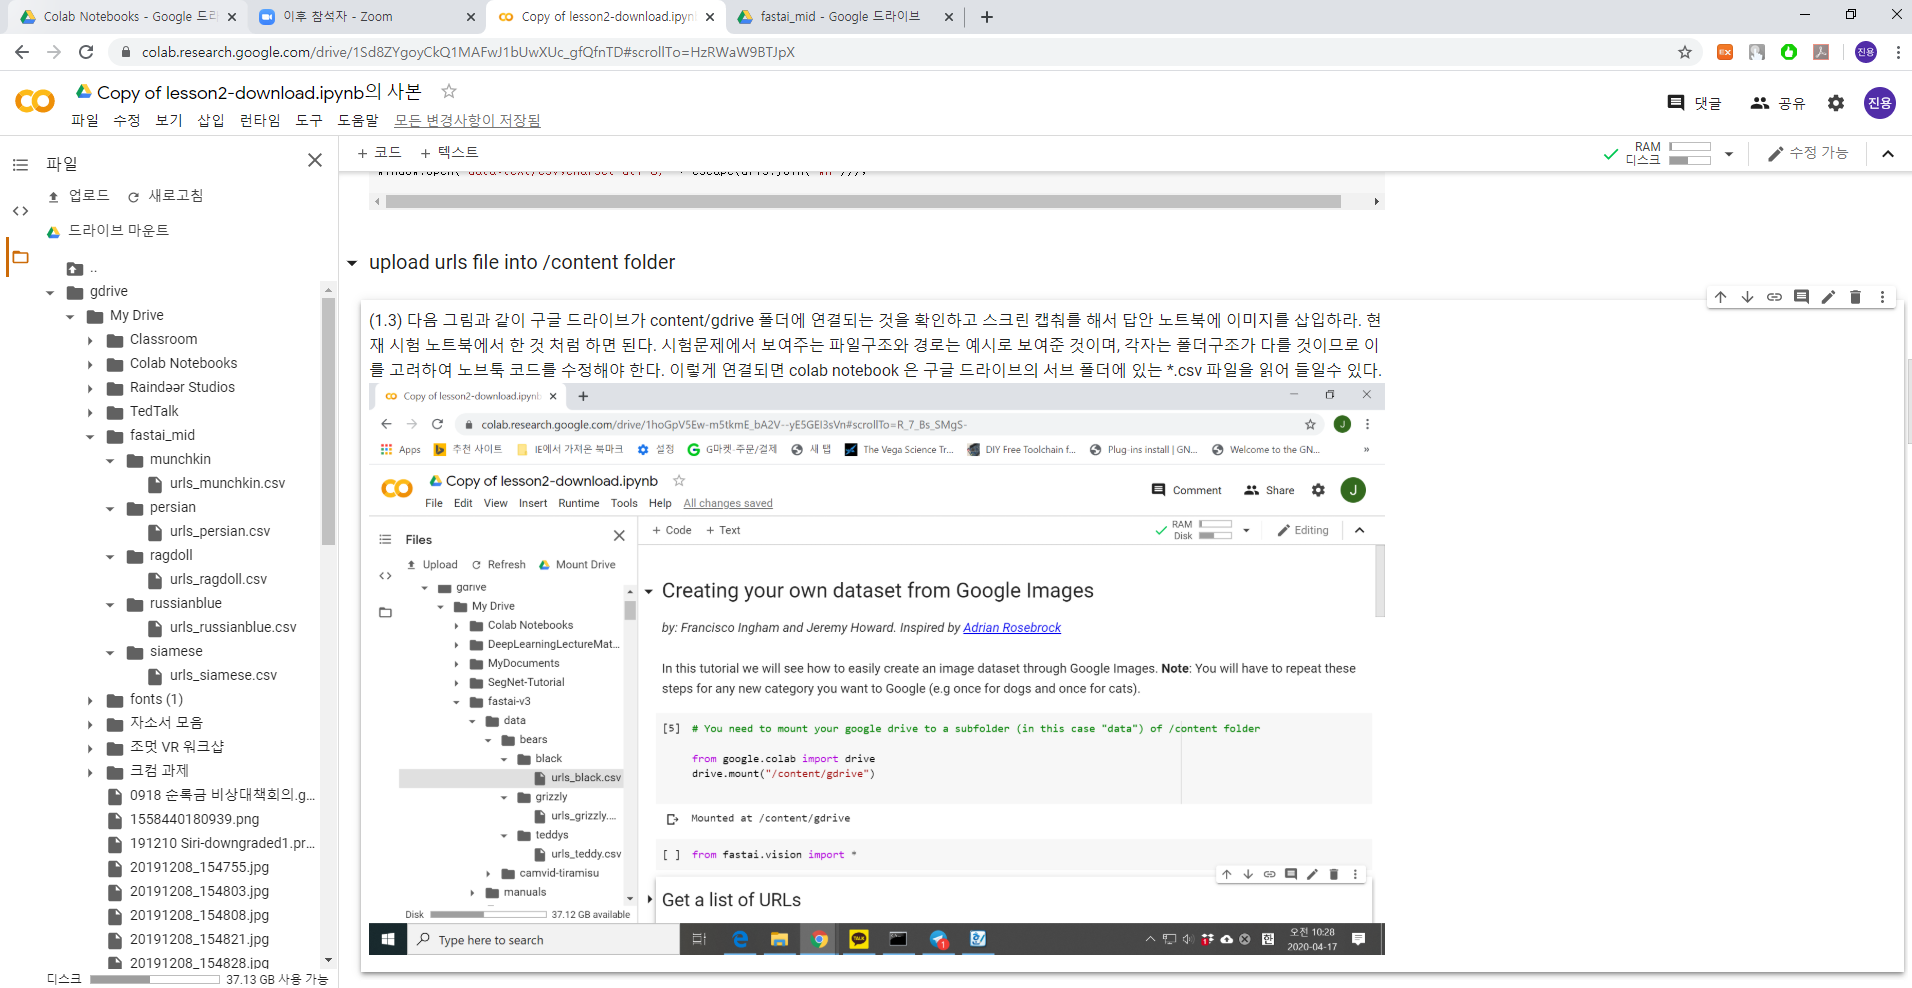

In [10]:
Image.open('cap1.png')

In [ ]:
path = Path('/content/gdrive/My Drive/fastai_mid')


In [14]:
print (path)

/content/gdrive/My Drive/fastai_mid


### *Question 2 : 10/10*

In [15]:
path.ls()
# Question 2: 위 명령어를 실행하여 무엇이 디스플레이되는지 확인하라. bears 폴더밑에 
# 등장하는 폴더 이름들이 이미지 classificaton 문제에서 어떤 역할을 하는지 설명하라. models 폴더를 제외하고.

[PosixPath('/content/gdrive/My Drive/fastai_mid/munchkin'),
 PosixPath('/content/gdrive/My Drive/fastai_mid/ragdoll'),
 PosixPath('/content/gdrive/My Drive/fastai_mid/siamese'),
 PosixPath('/content/gdrive/My Drive/fastai_mid/persian'),
 PosixPath('/content/gdrive/My Drive/fastai_mid/russianblue')]

\# 2번 문항 답변

위 명령어를 실행하면, ls()가 path 경로에 있는 파일들을 모두 출력해준다. 이때 등장하는 폴더 이름들은 이미지 classification에서 어떤 클래스명으로 구분하게 될지를 나타내는 카테고리로 기능한다. 또한 폴더의 이름 및 경로는, csv파일에 있는 이미지들을 다운로드 하기 위한 csv파일의 경로이자, 다운로드 한 이미지파일을 저장할 목적지 경로로 사용된다.

## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [ ]:
classes = ['munchkin','ragdoll','siamese', 'persian', 'russianblue']

### *Question 3 : 10/10*

In [18]:
# For example, Do this when download "urls_black.csv' file:
folder = 'munchkin'
dest = path/folder
file = 'urls_munchkin.csv'
download_images(dest/file, dest, max_pics=200)
# Question 3: download_images() 명령을 실행하기 전의 dest 폴더의 내용과 이후의 내용이 
# 어떻게 바뀌는지 기술하라.  폴더 안에 등장하는 이미지 파일들의 갯수는 모두 몇개인가? 
# 이 갯수는 어떻게 결정되는가?

\# 3번 문항 답변

download_image()이전에는 오직 urls_*(folder).csv 파일만이 dest 경로에 있었다. 그러나 다운로드 이후에는 urls에서 다운받아온 이미지파일(jpg)들이 dest경로에 생긴다. 기존의 csv파일은 없어지지는 않는다. 이때 이미지 파일의 갯수는 200개이며, 인자로 전달한 max_pics의 값이 이미지의 갯수를 결정한다.

In [ ]:
# If you have problems download, try with `max_workers=0` to see exceptions:
#download_images(dest/file, dest, max_pics=20, max_workers=0)
# cf: Having more workers will increase the memory usage and that’s the most serious overhead. 
# I’d just experiment and launch approximately as many as are needed to saturate the training. It depends on the batch size, but I wouldn’t set it to the same number - each worker loads a single batch and returns it only once it’s ready.
#num_workers equal 0 means that it’s the main process that will do the data loading when needed.
# For more information about num_works, refer to https://discuss.pytorch.org/t/guidelines-for-assigning-num-workers-to-dataloader/813


In [19]:
folder = 'ragdoll'
dest = path/folder
file = 'urls_ragdoll.csv'
download_images(dest/file, dest, max_pics=200)

In [20]:
folder = 'siamese'
dest = path/folder
file = 'urls_siamese.csv'
download_images(dest/file, dest, max_pics=200)

In [22]:
folder = 'russianblue'
dest = path/folder
file = 'urls_russianblue.csv'
download_images(dest/file, dest, max_pics=200)

In [21]:
folder = 'persian'
dest = path/folder
file = 'urls_persian.csv'
download_images(dest/file, dest, max_pics=200)

Then we can remove any images that can't be opened:

In [23]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

munchkin


ragdoll


siamese


persian


russianblue


## View data

In [26]:
doc(ImageDataBunch.from_folder)

### *Question 4 : 8/10*

*4.4 답편 부족*

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
                                                                    
# Question 4: 위 명령어에서 ImageDataBunch 클래스는 경로 path 파일구조안에 저장되어 있는 이미지 데이타를 
# 메모리 안으로 읽어들이는데 사용되는 여러가지 메소드을 정의한다.  from_folder() 메소드는 폴더구조를 
# 활용하여 이미지 분류에 필요한 정보를 읽어들이는 메소드이다. (4.1) 이 메소드의  파라미터들 중 
# train 은 무엇을 가리키는가 (4.2) valid_pct (= validation percentage ) 는 무엇을 가리키는가
# (4.3) ds_tfms 은 어떤 용도로 사용되는가? (4.4) size=224는 무엇을 의미하는가?
 


\# 4번 문항 답변

4.1 : train은 이미지 데이터 번치를 가져올 때, 서브폴더의 경로를 나타낸다. train = "."으로 되어있으므로 path내부의 모든 서브 폴더에서 데이터를 받아와 path에 이미지 데이터 번치를 생성하라는 뜻이다.


4.2 : valid_pct는 생성하는 이미지 데이터 번치에서 validation set에 얼마만큼의 데이터를 할당할 지를 결정하는 퍼센트이다. 0.2의 경우, 전체 데이터의 20퍼센트를 validation set로, 나머지 80퍼센트를 train set에 할당하는 것이다.


4.3 : ds_tfms는 dataset_transform으로, 여기서는 get_transforms()를 통해 기존 이미지 데이터를 뒤집기, 밝기 조정, 회전 등등의 방법으로 약간의 변형을 주어, 데이터를 다양하고 알아보기 어렵게 하여 보다 일반적인 데이터들에 적응할 수 있게 해준다. 

In [ ]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

### *Question 5 : 10/10*

In [29]:
data
# Question 5: 윗 명령을 실행하여 ImageDataBunch.from_folder() 의 결과가 저장된 data object 를 display 하라.
# display 된 것을 보면 data object 주어진 전체 데이타 집합을 신경망 Train 에 사용하는 데이타와 
# 신경망 검증 (Valid) 에 사용하는 데이타, 그리고 실제 테스트 (Test) 에 사용하는 데이타로 나누는데, 본 노트북은
# 테스트 데이타를 사용하지 않는다. 본 문제를 푸는데 data.classes, data.c, data.train_ds, data.valid_ds 명령어를  실행하여 
#  그 결과를 확인하는 것이 도움이 될 것이다.
# (5.1) (Valid 테이타의 수) / ( Train 데이타 수 + Valid 테이타 수) 를 
#  계산하면 어떤 값이 나오는가? 
# 이 값은 위에서 미리 설정한 어떤 파라미터 값과 동일한데, 그 파라미터가 무엇인지 기술하라.   
#  
# (5.2) data 오브젝트의 내부구조를 파악하는 것은 신경망 학습과정을 이해하는데 매우 중요하다. 이 data 는 사전구조를
# 가지므로 그 내용을 파악하기가 어렵지 않다.  
# (5.2) Train 데이타에서  x 는 이미지 리스트이고 ( = data.train_ds.x)  y 는 카테고리 리스트인데 (=data.train_ds.y),
#  아래 디스프레이된 표의 의미를 기술하라. [train_ds = train_dataset]
#  ( 아래 디스플레이된 것은 예시이며 각자의 노트북은 다를 것이다)
# (5.3) Valid 데이타에서  x 는 이미지 리스트이고  (data.valid_ds.x), y 는 카테고리 리스트인데 (data.valid_ds.y),
#   아래 디스프레이된 표의 의미를 기술하라.

ImageDataBunch;

Train: LabelList (800 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
munchkin,munchkin,munchkin,munchkin,munchkin
Path: /content/gdrive/My Drive/fastai_mid;

Valid: LabelList (200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
siamese,persian,persian,persian,siamese
Path: /content/gdrive/My Drive/fastai_mid;

Test: None

\# 5번 문항 답변

5.1 : train데이터 수 + valid데이터 수는 전체 데이터의 수 이다. 따라서 전체 데이터 수 분의 valid 데이터 수 = valid데이터가 전체 데이터에서 차지하는 비율이다. 이는 위에서 valid_pct라는 파라미터로 쓰였으며, 그 값은 0.2이다.


5.2 : train 데이터의 경우, 총 800개의 item을 가지고 있다. x는 이미지 리스트이고, Image(3, 244, 244)는 x에 속하는 이미지가 갖는 속성들을 나타낸다. 244x244의 크기를 가지며 이는 위에서 이미지 데이터 번치를 생성할 때 size = 244로 규정해주었다. 3은 이미지가 갖는 채널의 수를 나타내며, r,g,b 3개의 채널을 보유하고 있다. y는 카테고리 리스트로, y에 속하는 카테고리들의 값을 나타낸다. 이는 데이터 셋의 클래스와 동일하다. path는 이미지데이터번치의 위치를 나타낸다.


5.3 : valid 데이터의 경우, 총 200개의 item을 가지고 있다. x는 이미지 리스트이고, Image(3, 244, 244)는 x에 속하는 이미지가 갖는 속성들을 나타낸다. 244x244의 크기를 가지며 이는 위에서 이미지 데이터 번치를 생성할 때 size = 244로 규정해주었다. 3은 이미지가 갖는 채널의 수를 나타내며, r,g,b 3개의 채널을 보유하고 있다. y는 카테고리 리스트로, y에 속하는 카테고리들의 값을 나타낸다. 이는 데이터 셋의 클래스와 동일하다. path는 이미지데이터번치의 위치를 나타낸다.

In [34]:
len(data.valid_ds.y)


     

200

In [35]:
data.classes

['munchkin', 'persian', 'ragdoll', 'russianblue', 'siamese']

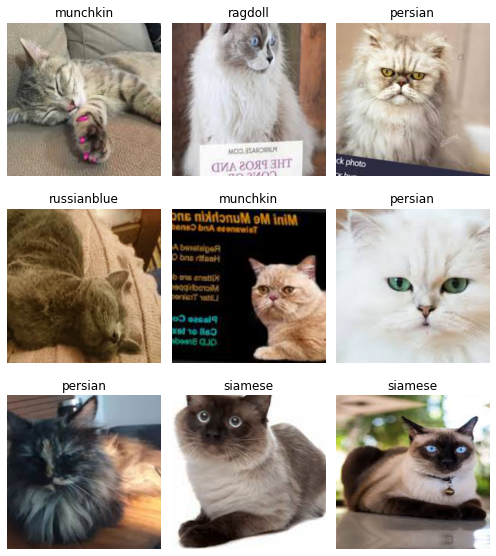

In [36]:
data.show_batch(rows=3, figsize=(7,8))

In [37]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['munchkin', 'persian', 'ragdoll', 'russianblue', 'siamese'], 5, 800, 200)

## Train model

### *Question 6 : 15/15*

In [38]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
# Question 6: cnn_learner() 는 cnn 신경망을 학습하는 프로그램을 내장한 object인 learn 을 
# 생산하는 함수이다. 이 learn 오브젝트가 제공하는 학습실행 메소드를 실행하면 신경망의 학습이 완료된다
# cnn_learner 함수의 두번째 파라미터는 resnset34 라고 불리는 이미지 분류를 위해 설계된 신경망 구조 (architecture)
# 이다. resnet34 는 이 신경망 구조를 지칭하는 말로 쓰이기도 하지만, 문맥에 따라서는 주어진 이미지에 대해 
# 37 개의 카테고리에 속할 확률을 계산하기 위해 아주 많은 수의 이미지를 대상으로  이미 학습된 신경망을 가리키기도 한다. 
# 본 노트북의 경우 인터넷에서 검색한 이미지들에 대해서 우리가 설정한 카테고리를 이용하는 신경망을 구축하는 것이 
# 목적인데 위 명령어는 resnet34 이라는 구조를 이용하여 구축한다는 것을 의미한다.  
# (6.1) cnn_learner() 는 위에 표시된 파라미터 이외에도 다른 파라미터가 있는데 그중에 특히 중요한 것이
# pretrained 라는 것인데, 위 명령어에서는 명시적으로 설정되지 않았다. 이 경우 이 파라미터는 default 값을 가지는데
# 이 default값이 True 이다. 이것은 이미 학습된 resnet34 를 이용하라는 뜻이다. 어떻게 이용하는지 그 원리와 근거를 
# 기술하라. (6.2) pretrained = False 로 설정하면 어떤 일이 일어나는가?  본 노트북은 수백개의 이미지를 가지고 신경망을
# 학습하는데, pretrained = False 상태에서 수백개의 이미지를 가지고 신경망을 학습시킬 경우 그 신경망의 성능에 대해서
# 어떤 예측을 할 수 있는가?   

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


\# 6번 문항 답변

6.1 : pretained True일때, 이미 학습된 arch(architecture, resnet34)에서 weight(가중치)를 받아와 사용한다. 이때, 마지막에 fully connected layer가 추가되며, 이 레이어 앞에 존재하는 레이어들은 수정할 수 없는(freeze) 상태가 된다. 그러나 이때 적용되는 가중치는 수많은 데이터들에 적용되면서 갱신된 가중치이므로, 현재 데이터에 특화되어 있지는 않다.


6.2 : pretained가 false이면, 받아온 가중치를 사용하지 않고, 첫 가중치 초기화를 랜덤으로 하게 된다. 기존의 다양한 데이터를 학습하면서 설정된 가중치가 아니라 랜덤으로 설정된 가중치를 사용하기 때문에, 신경망이 학습하는데에 걸리는 시간에는 큰 차이가 없으나, 그 결과의 정확도가 떨어지게 된다. 대신 학습을 반복할 경우, 보다 현재 가지고 있는 이미지 데이터에 특화된 가중치를 가지게 될 것이다.

### *Question 7 : 20/20*

In [39]:
learn.fit_one_cycle(4)
# Question 7: (7.1) 위 명령어가 하는 일은 무엇이며, 그 결과로 디스플레이되는 아래 표에서 epoch 는 무엇을 가리키며,
#  각 epoch에 대해서 # 표시되는 train_loss, valid_loss, error_rate 은 무엇을 의미하는지 설명하라. 
# (7.2) epoch가 증가할 수록 train_loss와 valid_loss의 값이 어떻게 변화되는가? 이 변화의 의미는 무엇인가?

epoch,train_loss,valid_loss,error_rate,time
0,1.922152,0.653303,0.185000,00:09
1,1.362236,0.604157,0.155000,00:09
2,1.074131,0.571140,0.150000,00:09
3,0.889063,0.575888,0.155000,00:09


\# 7번 문항 답변

7.1 : 위 명령어는 러너에게 학습을 4회 수행하는 것을 명령한다. epoch는 러너가 한번 학습을 완료한 상태를 나타내는, 즉 학습의 횟수이다. fit_one_cyle()은 인자로 전달한 값과 동일한 횟수를 학습한다. 각 epoch에서 나타나는 valid_loss와 train_loss는 각각 validation set와 train set에서 학습했을 때 나타난 손실을 나타낸다. 손실은 예측한 결과와 실제 값의 차이를 나타내는 지표이다. error_rate는 예측에 실패한 비율이다. 반대의 개념으로 1-error_rate로 accuracy를 구할 수 있으며, 이는 예측이 성공한 비율, 측 정확도를 나타낸다.

7.2 epoch가 증가할수록 train_loss와 valid_loss의 값이 점점 줄어드는데, 이는 예측과 실제 간의 차이가 점점 줄어들고 있음을 의미한다. 따라서 점점 예측의 정확도가 높아지고 있다고 볼 수 있다. 하지만 이때 만약 train_loss의 값은 줄어드느는데 valid_loss의 값이 늘어난다면 러너가 지금의 데이터 셋에 지나치게 특화되어 보편성을 잃게 된 것이므로, 이를 구별하기 위해 validation set을 같이 학습하는 것이다.

In [40]:
interp = ClassificationInterpretation.from_learner(learn)

### *Question 8 : 10/10*

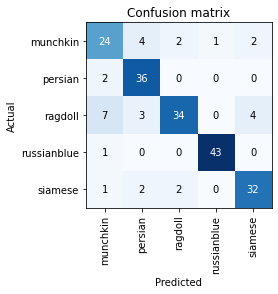

In [41]:
interp.plot_confusion_matrix()
# Question 8: interp object 는 학습된 신경망의 분류 능력을 해석/평가하는데
# 사용되는 오브젝트이다. plot_confusion_matrix() 메소드는 분류능력을 해석하는데 도움을 
# 주는 데이타이다. 이 표에 의하면 학습된 신경망의 이미지 분류 성능에 대해서 어떤 평가를 할 수 있는지
# 최대한 상세히 기술하라. ( 이 표도 예시이며 각자가 5개의 카테고리를 
# 분류하는 신경망을 구축하는 경우 다른 표가 나올 것이다)  

\# 8번 문항 답변

표에서 나타난 숫자는 러너가 예측한 결과의 횟수를 나타낸다. 예를 들어, 위 표의 숫자 7은 러너가 실제로는 ragdoll인 이미지를 munchkin이라고 예측한 횟수가 7번인 것이다. 이때 대각선(왼쪽 위에서 오른쪽 아래로)은 actual과 predicted가 일치한, 제대로 예측한 횟수이므로 대각선의 수가 높고, 색이 짙을 수록 예측이 정확하다고 해석할 수 있다. 이떄, 대각선을 제외한 위치의 숫자가 높다면, 이는 actual과 predicted가 일치하지 않는 예측의 횟수이므로 정확도가 낮다고 볼 수 있다. 이때, 대각선이 아닌 항목들에서 숫자가 높은 항목들을 통해, 러너가 예측하기 힘들어하는 어려운 사례들을 발견할 수 있다.